# Pre-processing the datasets.

We will pre-process the datasets to match the needs of each model. For each dataset, we will have different versions.

##### Importing Libraries

In [79]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import talib
import matplotlib.pyplot as plt

##### Loading the ingested datasets

In [2]:
df_cdipa = pd.read_csv('data\\ingested\\cdipa.csv')
df_cfrsw = pd.read_csv('data\\ingested\\cfrsw.csv')
df_lulu = pd.read_csv('data\\ingested\\lulu.csv')
df_mcpa = pd.read_csv('data\\ingested\\mcpa.csv')
df_moncmi = pd.read_csv('data\\ingested\\moncmi.csv')
df_pndoraco = pd.read_csv('data\\ingested\\pndoraco.csv')
df_rl = pd.read_csv('data\\ingested\\rl.csv')
df_rmspa = pd.read_csv('data\\ingested\\rmspa.csv')
df_uhrsw = pd.read_csv('data\\ingested\\uhrsw.csv')
df_vfc = pd.read_csv('data\\ingested\\vfc.csv')

##### Converting the Date column to datetime format, and setting it as index 

In [3]:
df_cdipa['Date'] = pd.to_datetime(df_cdipa['Date'])
df_cfrsw['Date'] = pd.to_datetime(df_cfrsw['Date'])
df_lulu['Date'] = pd.to_datetime(df_lulu['Date'])
df_mcpa['Date'] = pd.to_datetime(df_mcpa['Date'])
df_moncmi['Date'] = pd.to_datetime(df_moncmi['Date'])
df_pndoraco['Date'] = pd.to_datetime(df_pndoraco['Date'])
df_rl['Date'] = pd.to_datetime(df_rl['Date'])
df_rmspa['Date'] = pd.to_datetime(df_rmspa['Date'])
df_uhrsw['Date'] = pd.to_datetime(df_uhrsw['Date'])
df_vfc['Date'] = pd.to_datetime(df_vfc['Date'])

In [4]:
df_cdipa = df_cdipa.set_index('Date')
df_cfrsw = df_cfrsw.set_index('Date')
df_lulu = df_lulu.set_index('Date')
df_mcpa = df_mcpa.set_index('Date')
df_moncmi = df_moncmi.set_index('Date')
df_pndoraco = df_pndoraco.set_index('Date')
df_rl = df_rl.set_index('Date')
df_rmspa = df_rmspa.set_index('Date')
df_uhrsw = df_uhrsw.set_index('Date')
df_vfc = df_vfc.set_index('Date')

##### Saving the original dataframes

In [5]:
df_cdipa_original = df_cdipa.copy()
df_cfrsw_original = df_cfrsw.copy()
df_lulu_original = df_lulu.copy()
df_mcpa_original = df_mcpa.copy()
df_moncmi_original = df_moncmi.copy()
df_pndoraco_original = df_pndoraco.copy()
df_rl_original = df_rl.copy()
df_rmspa_original = df_rmspa.copy()
df_uhrsw_original = df_uhrsw.copy()
df_vfc_original = df_vfc.copy()

## 1. Creating the Target variable (returns)

The variable that we want to predict is the returns of a stock (the difference between the close and open price) as a percentage of the open price.

In [6]:
def create_target(stock):
    df = stock.copy()
    df['Returns'] = ((df['Close'] - df['Open']) / df['Open']) * 100
    return df

In [7]:
df_cdipa = create_target(df_cdipa)
df_cfrsw = create_target(df_cfrsw)
df_lulu = create_target(df_lulu)
df_mcpa = create_target(df_mcpa)
df_moncmi = create_target(df_moncmi)
df_pndoraco = create_target(df_pndoraco)
df_rl = create_target(df_rl)
df_rmspa = create_target(df_rmspa)
df_uhrsw = create_target(df_uhrsw)
df_vfc = create_target(df_vfc)

In [8]:
#Saving the datasets with target (for the dummy regressor)
df_cdipa['Returns'].to_csv('data\\processed\\cdipa_dummy.csv')
df_cfrsw['Returns'].to_csv('data\\processed\\cfrsw_dummy.csv')
df_lulu['Returns'].to_csv('data\\processed\\lulu_dummy.csv')
df_mcpa['Returns'].to_csv('data\\processed\\mcpa_dummy.csv')
df_moncmi['Returns'].to_csv('data\\processed\\moncmi_dummy.csv')
df_pndoraco['Returns'].to_csv('data\\processed\\pndoraco_dummy.csv')
df_rl['Returns'].to_csv('data\\processed\\rl_dummy.csv')
df_rmspa['Returns'].to_csv('data\\processed\\rmspa_dummy.csv')
df_uhrsw['Returns'].to_csv('data\\processed\\uhrsw_dummy.csv')
df_vfc['Returns'].to_csv('data\\processed\\vfc_dummy.csv')

## 2. Adding features

### 2.1 Lagged Values

The first features we are going to add are lagged values of the target (returns)

In [9]:
def create_lagged_values(stock, lags=[]):
    df = stock.copy()

    for i in lags:
        df[f'Lag{i}'] = df['Returns'].shift(i)

    df = df.dropna()
    return df

We will look at every stock individually in order to determine which lags we should include.

#### 2.1.1 CDI.PA

Text(0.5, 1.0, 'Daily Returns of CDI.PA between 2018 and 2023')

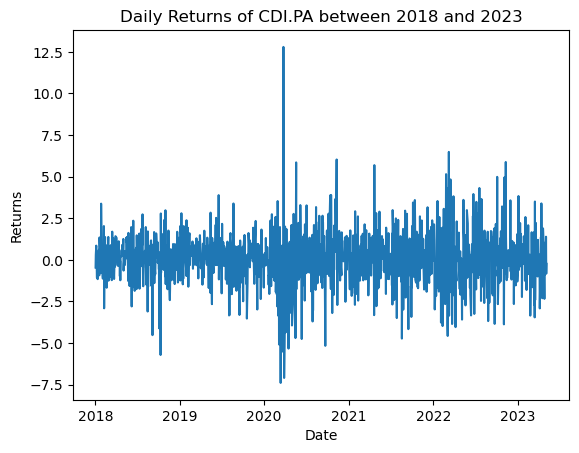

In [10]:
sns.lineplot(df_cdipa.Returns).set_title('Daily Returns of CDI.PA between 2018 and 2023')

In [11]:
acorr_ljungbox(df_cdipa.Returns, lags=10)

,lb_stat,lb_pvalue
1,0.789033,0.374393
2,2.094735,0.350860
3,5.598492,0.132865
4,6.424024,0.169641
5,8.221330,0.144452
6,9.840547,0.131530
7,9.888025,0.195008
8,10.248578,0.248011
9,10.260785,0.329789
10,11.875956,0.293444


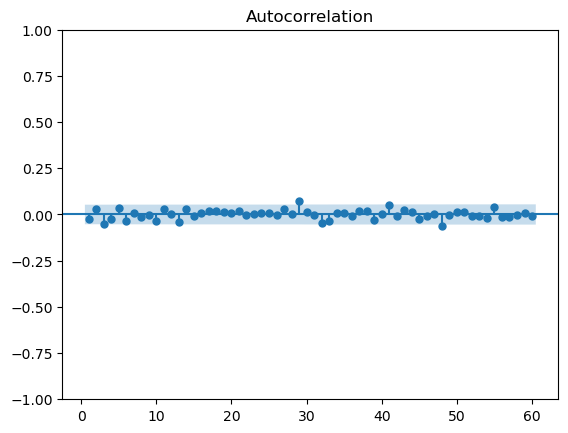

In [12]:
plot_acf(df_cdipa.Returns, zero=False, lags = 60);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


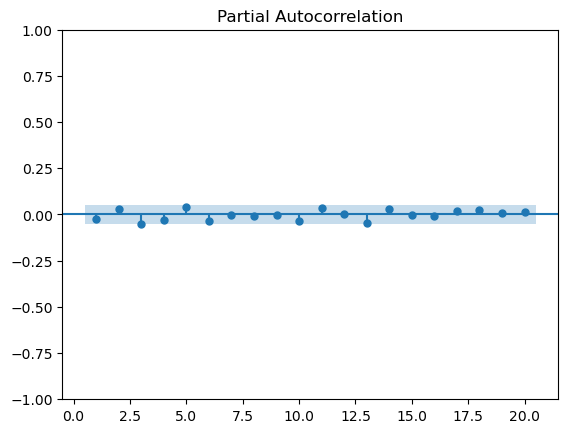

In [13]:
plot_pacf(df_cdipa.Returns, zero=False, lags = 20);

It seems that none of the lags are significant in the autocorrelation and partial autocorrelation functions of this time series. It is also confirmed with the ljung-box test. This means that the observations in this series are independent from one another, and we will not be using lagged values in the model.

In [14]:
df_cdipa = create_lagged_values(df_cdipa, lags = [])

In [15]:
df_cdipa.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2018-01-02,301.200012,303.5,298.399994,299.799988,257.664459,26734,-0.464816


#### 2.1.2 CFR.SW

Text(0.5, 1.0, 'Daily Returns of CFR.SW between 2018 and 2023')

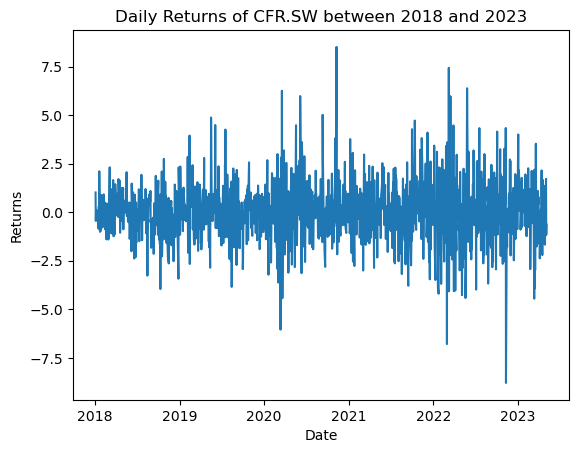

In [16]:
sns.lineplot(df_cfrsw.Returns).set_title('Daily Returns of CFR.SW between 2018 and 2023')

In [17]:
acorr_ljungbox(df_cfrsw.Returns, lags=10)

,lb_stat,lb_pvalue
1,1.016404,0.313373
2,5.030990,0.080823
3,7.585193,0.055409
4,10.750148,0.029520
5,10.806154,0.055362
6,10.847725,0.093198
7,13.353573,0.063948
8,13.507814,0.095531
9,16.381600,0.059328
10,16.433300,0.087882


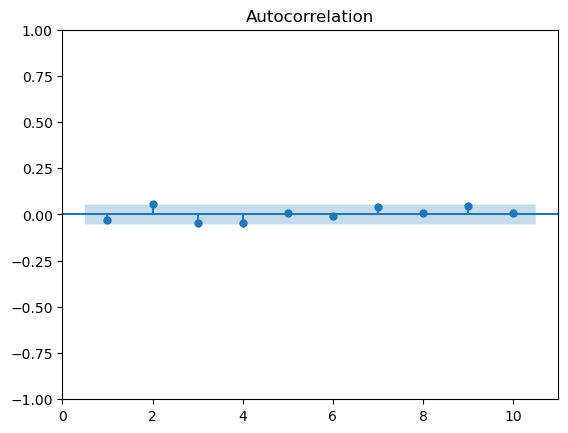

In [18]:
plot_acf(df_cfrsw.Returns, zero=False, lags = 10);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


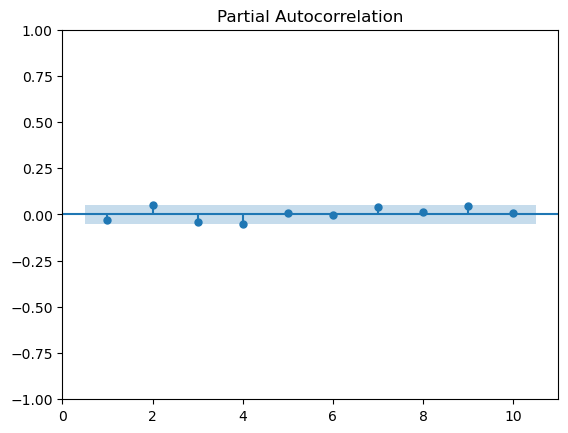

In [19]:
plot_pacf(df_cfrsw.Returns, zero=False, lags = 10);

It doesn't look too convincing, but lag 4 looks a bit significative in the plots (it is in the ljung-box test as well), so we will take it.

In [20]:
df_cfrsw = create_lagged_values(df_cfrsw, lags = [4])

In [21]:
df_cfrsw.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag4
Date,,,,,,,,
2018-01-09,89.779999,90.300003,89.559998,89.860001,81.679886,1584779,0.089109,1.018101


#### 2.1.3 LULU

Text(0.5, 1.0, 'Daily Returns of LULU between 2018 and 2023')

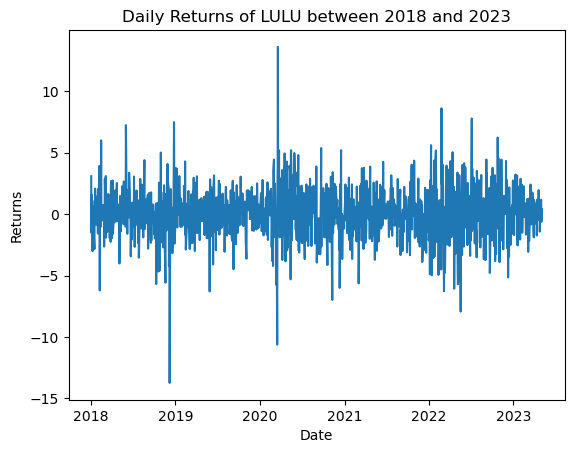

In [22]:
sns.lineplot(df_lulu.Returns).set_title('Daily Returns of LULU between 2018 and 2023')

In [23]:
acorr_ljungbox(df_lulu.Returns, lags=10)

,lb_stat,lb_pvalue
1,0.365404,0.545520
2,1.489929,0.474751
3,3.861042,0.276865
4,4.126218,0.389193
5,4.130953,0.530720
6,5.908446,0.433524
7,5.909810,0.550319
8,6.008412,0.646290
9,6.143335,0.725491
10,6.147143,0.802753


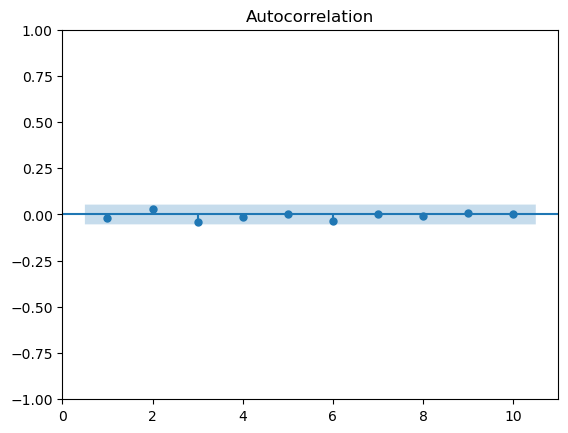

In [24]:
plot_acf(df_lulu.Returns, zero=False, lags = 10);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


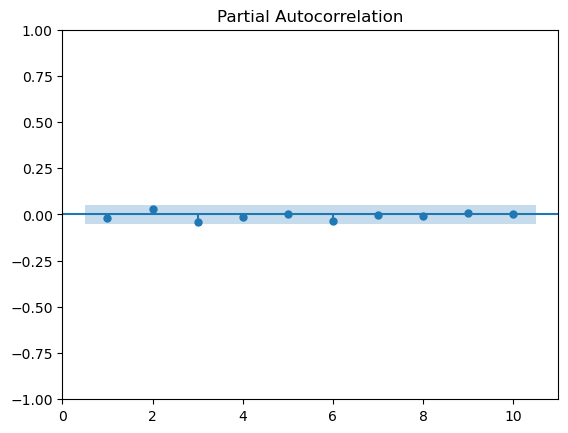

In [25]:
plot_pacf(df_lulu.Returns, zero=False, lags = 10);

Same as the first stock, it looks like white noise and no significant values. We will not take any lags here.

In [26]:
df_lulu = create_lagged_values(df_lulu, lags = [])

In [27]:
df_lulu.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2018-01-02,77.309998,80.269997,77.309998,79.690002,79.690002,2474400,3.078521


#### 2.1.4 MC.PA

Text(0.5, 1.0, 'Daily Returns of MC.PA between 2018 and 2023')

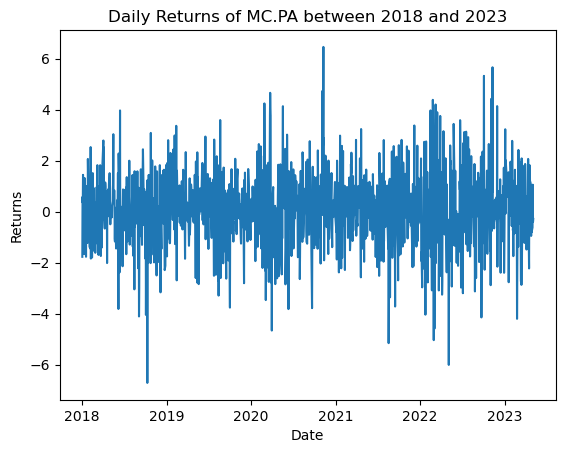

In [28]:
sns.lineplot(df_mcpa.Returns).set_title('Daily Returns of MC.PA between 2018 and 2023')

In [29]:
acorr_ljungbox(df_mcpa.Returns, lags=10)

,lb_stat,lb_pvalue
1,1.168943,0.279619
2,1.707105,0.425899
3,1.994704,0.573507
4,2.034424,0.729427
5,2.065980,0.839942
6,2.936054,0.816829
7,3.780832,0.804647
8,3.815033,0.873414
9,7.077028,0.629100
10,9.529803,0.482666


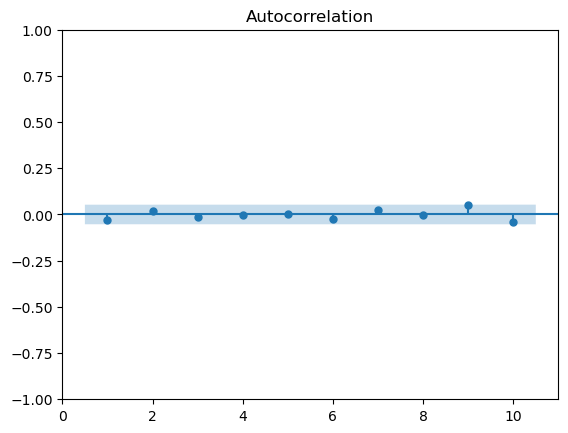

In [30]:
plot_acf(df_mcpa.Returns, zero=False, lags = 10);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


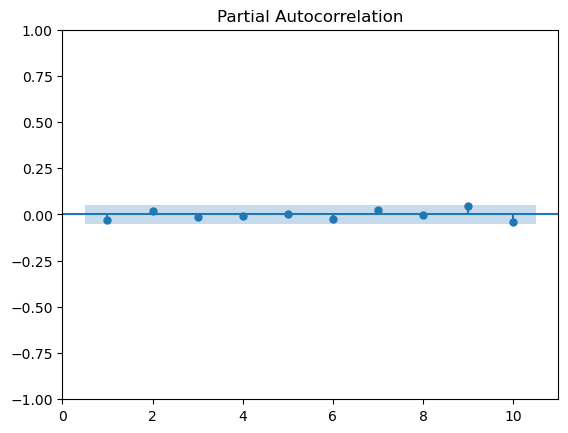

In [31]:
plot_pacf(df_mcpa.Returns, zero=False, lags = 10);

No significant lags..

In [32]:
df_mcpa = create_lagged_values(df_mcpa, lags = [])

In [33]:
df_mcpa.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2018-01-02,245.649994,246.0,240.800003,241.300003,219.011703,631294,-1.770808


#### 2.1.5 MONC.MI

Text(0.5, 1.0, 'Daily Returns of MONC.MI between 2018 and 2023')

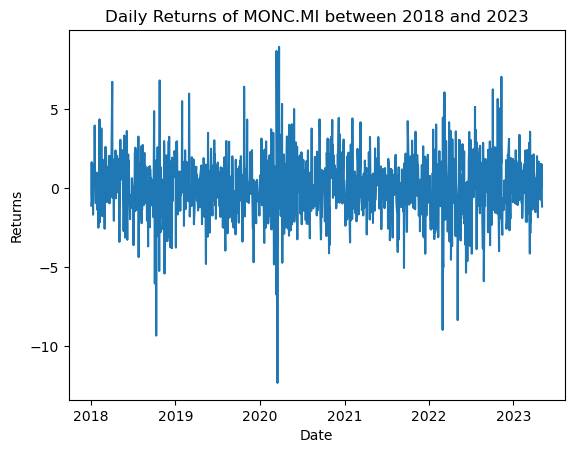

In [34]:
sns.lineplot(df_moncmi.Returns).set_title('Daily Returns of MONC.MI between 2018 and 2023')

In [35]:
acorr_ljungbox(df_moncmi.Returns, lags=10)

,lb_stat,lb_pvalue
1,3.443571,0.063498
2,6.893305,0.031852
3,6.970123,0.072856
4,8.110820,0.087602
5,8.992116,0.109379
6,9.518642,0.146442
7,9.939199,0.192045
8,9.940143,0.269252
9,12.248507,0.199659
10,12.257093,0.268219


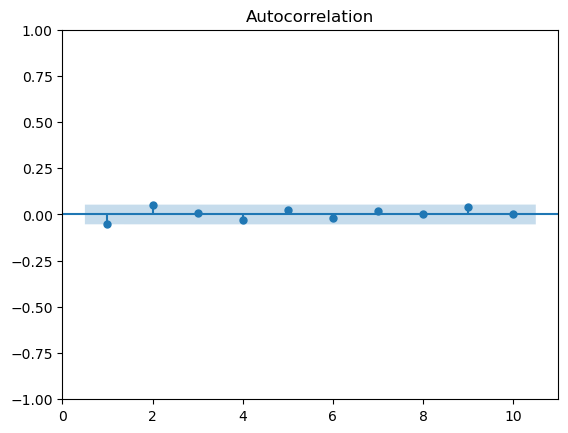

In [36]:
plot_acf(df_moncmi.Returns, zero=False, lags = 10);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


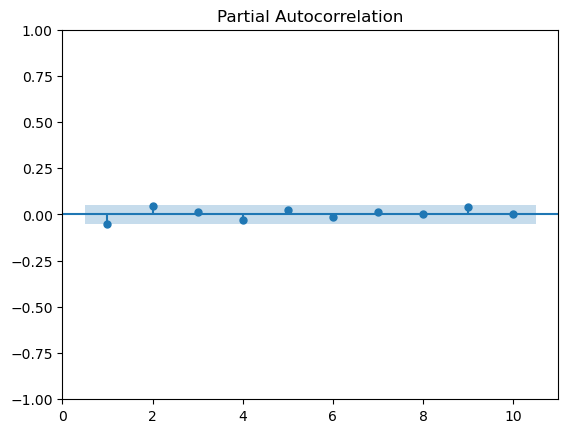

In [37]:
plot_pacf(df_moncmi.Returns, zero=False, lags = 10);

Here, based on the ljung-box test, we will take lag 2.

In [38]:
df_moncmi = create_lagged_values(df_moncmi, lags = [2])

In [39]:
df_moncmi.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag2
Date,,,,,,,,
2018-01-04,25.68,26.200001,25.620001,26.1,24.388063,802020,1.635514,-1.11154


#### 2.1.6 PNDORA.CO

Text(0.5, 1.0, 'Daily Returns of PNDORA.CO between 2018 and 2023')

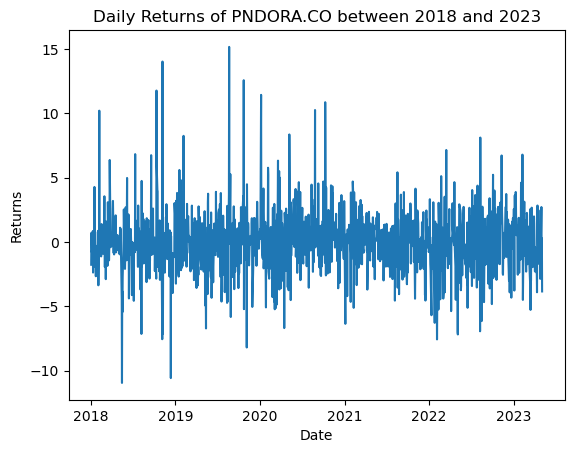

In [40]:
sns.lineplot(df_pndoraco.Returns).set_title('Daily Returns of PNDORA.CO between 2018 and 2023')

In [41]:
acorr_ljungbox(df_pndoraco.Returns, lags=10)

,lb_stat,lb_pvalue
1,0.629718,0.427459
2,4.687478,0.095968
3,6.062332,0.108617
4,6.265233,0.180197
5,8.685933,0.122266
6,9.291601,0.157831
7,10.626312,0.155770
8,12.123077,0.145796
9,12.775010,0.173054
10,13.405262,0.201887


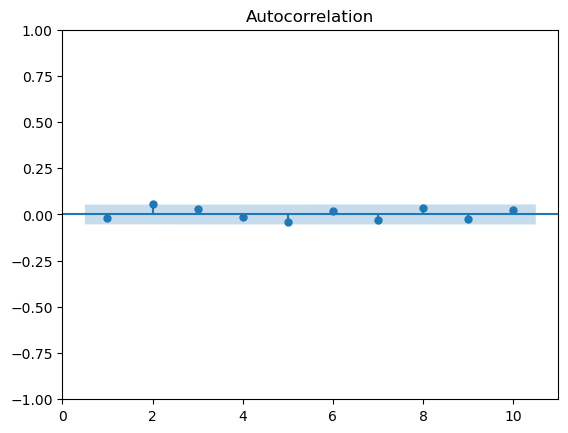

In [42]:
plot_acf(df_pndoraco.Returns, zero=False, lags = 10);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


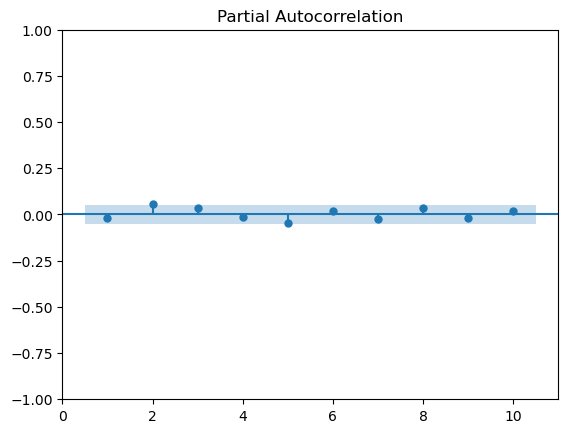

In [43]:
plot_pacf(df_pndoraco.Returns, zero=False, lags = 10);

No significant value in the ljung-box test. We won't take any lag.

In [44]:
df_pndoraco = create_lagged_values(df_pndoraco, lags = [])

In [45]:
df_pndoraco.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2018-01-02,680.0,683.0,656.0,668.0,559.038574,802797,-1.764706


#### 2.1.7 RL

Text(0.5, 1.0, 'Daily Returns of RL between 2018 and 2023')

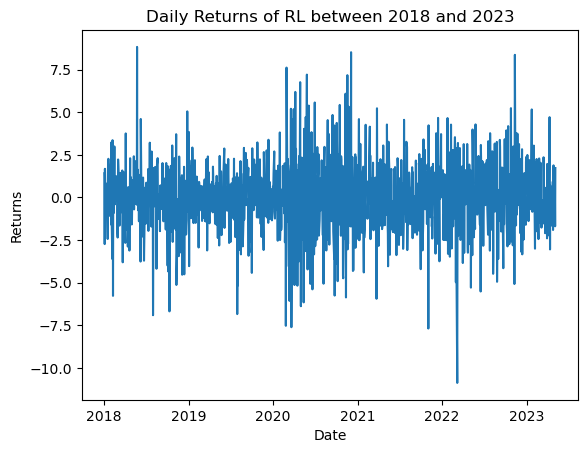

In [46]:
sns.lineplot(df_rl.Returns).set_title('Daily Returns of RL between 2018 and 2023')

In [47]:
acorr_ljungbox(df_rl.Returns, lags=20)

,lb_stat,lb_pvalue
1,0.682352,0.408778
2,4.890000,0.086726
3,17.772418,0.000490
4,17.977312,0.001247
5,18.443395,0.002439
6,19.968507,0.002805
7,20.317497,0.004923
8,20.322699,0.009182
9,23.089759,0.005998
10,23.093113,0.010408


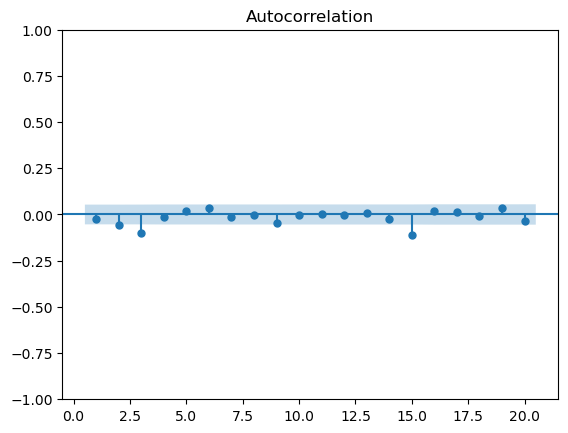

In [48]:
plot_acf(df_rl.Returns, zero=False, lags = 20);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


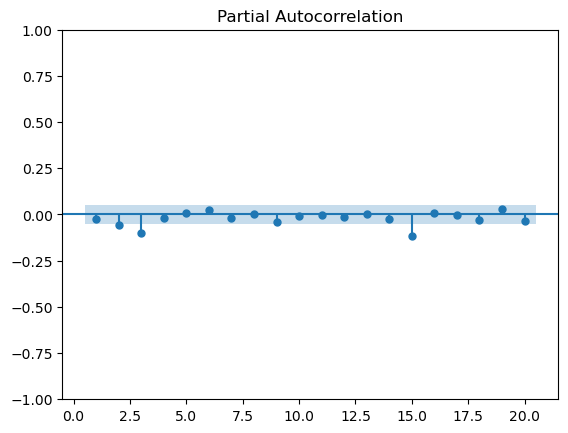

In [49]:
plot_pacf(df_rl.Returns, zero=False, lags = 20);

Finally a significant lag that we can see in the acf and pacf!! :D  
We will take lag 3 and 15 (even though more lags are significant in the ljung-box test, but we can't see it visually in the plots.)

In [50]:
df_rl = create_lagged_values(df_rl, lags = [3, 15])

In [51]:
df_rl.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag3,Lag15
Date,,,,,,,,,
2018-01-24,116.18,119.330002,116.019997,117.739998,105.638786,1058100,1.342742,2.266957,1.42152


#### 2.1.8 RMS.PA

Text(0.5, 1.0, 'Daily Returns of RMS.PA between 2018 and 2023')

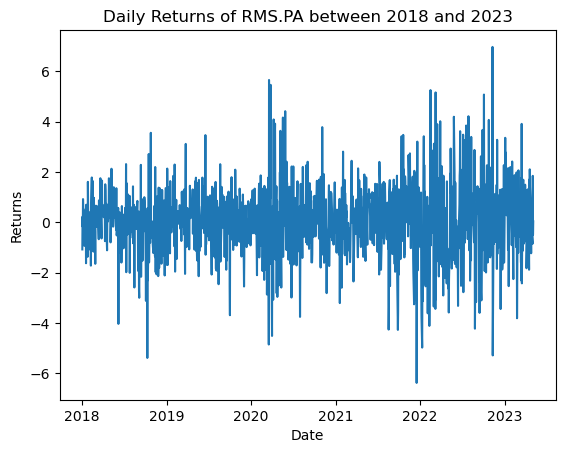

In [52]:
sns.lineplot(df_rmspa.Returns).set_title('Daily Returns of RMS.PA between 2018 and 2023')

In [53]:
acorr_ljungbox(df_rmspa.Returns, lags=10)

,lb_stat,lb_pvalue
1,0.601438,0.438030
2,5.345885,0.069049
3,9.309617,0.025445
4,9.353383,0.052849
5,11.534380,0.041756
6,14.276421,0.026696
7,14.794683,0.038723
8,16.510756,0.035626
9,22.563330,0.007255
10,22.717120,0.011840


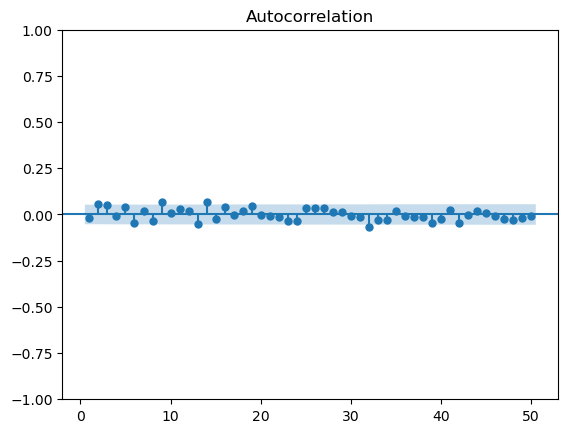

In [54]:
plot_acf(df_rmspa.Returns, zero=False, lags = 50);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


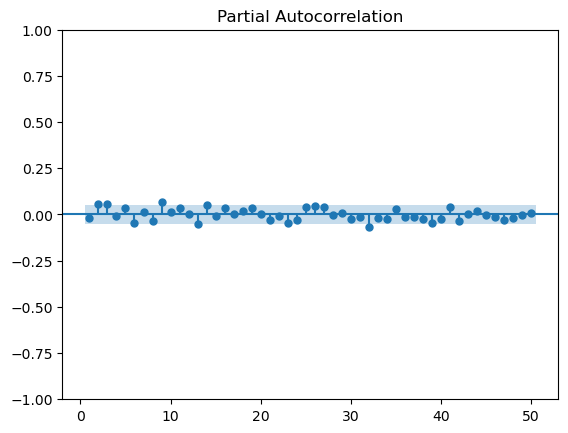

In [55]:
plot_pacf(df_rmspa.Returns, zero=False, lags = 50);

Lags: 3, 6 , 9, 13, 32

In [56]:
df_rmspa = create_lagged_values(df_rmspa, lags = [3, 6, 9, 13, 32])

In [57]:
df_rmspa.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag3,Lag6,Lag9,Lag13,Lag32
Date,,,,,,,,,,,,
2018-02-15,435.799988,444.399994,435.299988,443.0,423.849396,45406,1.652137,1.784039,0.371662,-0.561167,-1.093993,-1.076713


#### 2.1.9 UHR.SW

Text(0.5, 1.0, 'Daily Returns of UHR.SW between 2018 and 2023')

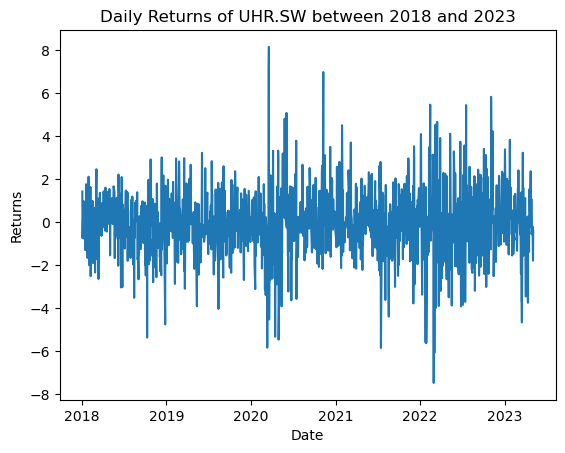

In [58]:
sns.lineplot(df_uhrsw.Returns).set_title('Daily Returns of UHR.SW between 2018 and 2023')

In [59]:
acorr_ljungbox(df_uhrsw.Returns, lags=10)

,lb_stat,lb_pvalue
1,0.404962,0.524538
2,2.600017,0.272529
3,3.454207,0.326750
4,4.365256,0.358825
5,6.878990,0.229797
6,7.316871,0.292534
7,7.541673,0.374736
8,7.542649,0.479369
9,8.416180,0.492809
10,8.735555,0.557371


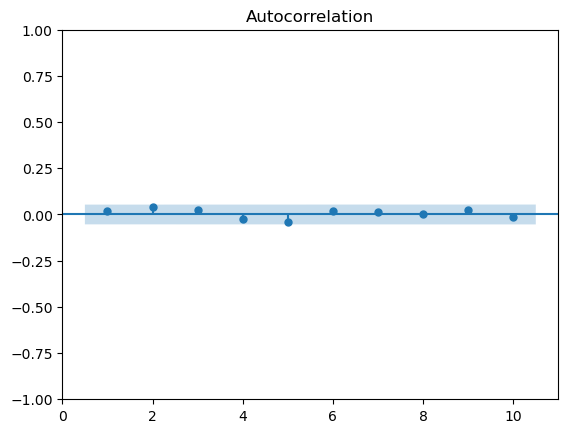

In [60]:
plot_acf(df_uhrsw.Returns, zero=False, lags = 10);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


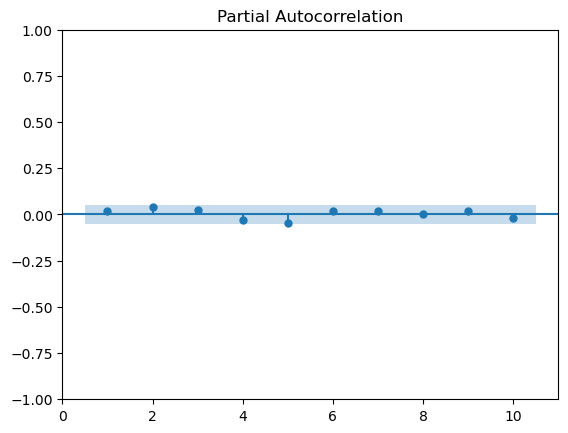

In [61]:
plot_pacf(df_uhrsw.Returns, zero=False, lags = 10);

No lags

In [62]:
df_uhrsw = create_lagged_values(df_uhrsw, lags = [])

In [63]:
df_uhrsw.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2018-01-03,397.100006,402.799988,395.799988,402.799988,359.149536,217286,1.435402


#### 2.1.10 VFC

Text(0.5, 1.0, 'Daily Returns of VFC between 2018 and 2023')

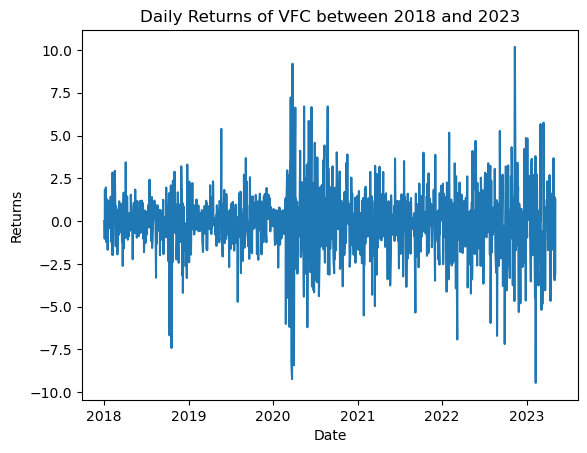

In [64]:
sns.lineplot(df_vfc.Returns).set_title('Daily Returns of VFC between 2018 and 2023')

In [65]:
acorr_ljungbox(df_vfc.Returns, lags=10)

,lb_stat,lb_pvalue
1,0.219383,6.395106e-01
2,7.045661,2.951577e-02
3,19.704634,1.954259e-04
4,33.965719,7.573500e-07
5,34.056843,2.319760e-06
6,36.694964,2.019144e-06
7,51.618970,6.940221e-09
8,51.789031,1.848574e-08
9,52.602445,3.476591e-08
10,53.364694,6.370309e-08


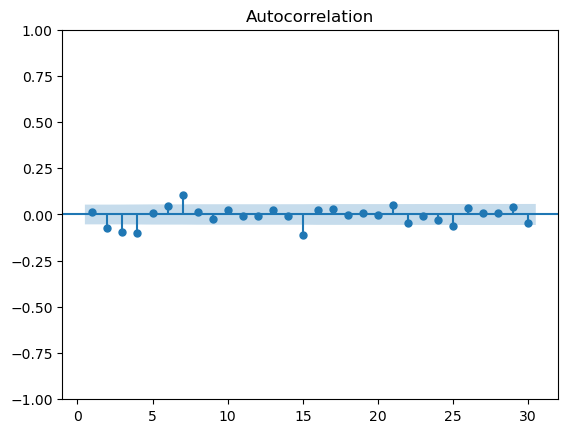

In [66]:
plot_acf(df_vfc.Returns, zero=False, lags = 30);

d:\miniconda3\envs\stocks\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


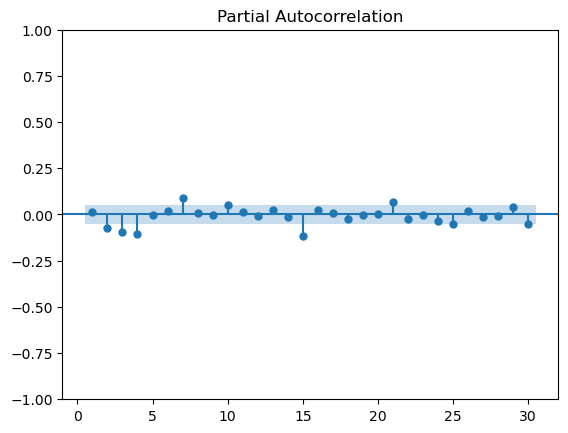

In [67]:
plot_pacf(df_vfc.Returns, zero=False, lags = 30);

A lot of significative lags. We will use: 2, 3, 4, 7, 15, 22

In [68]:
df_vfc = create_lagged_values(df_vfc, lags = [2, 3, 4, 7, 15, 22])

In [69]:
df_vfc.head(1)

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag2,Lag3,Lag4,Lag7,Lag15,Lag22
Date,,,,,,,,,,,,,
2018-02-02,75.866287,76.610168,75.094162,75.22599,64.12635,3391922,-0.843981,-1.19337,-0.388875,1.425235,-0.246397,1.299215,0.0


### 2.2 Sentiment Analysis

In [70]:
stocks = ["MC.PA", "RMS.PA", "CDI.PA", "CFR.SW","LULU", "MONC.MI", "UHR.SW", "VFC", "PNDORA.CO", "RL"]
sanalysis = pd.read_csv("data/sentiment_analysis_articles.csv")
sanalysis = sanalysis.groupby(['published', 'stock'])[['title_sentiment_VADER', 'summary_sentiment_VADER']].mean()
sanalysis = sanalysis.reset_index()
sanalysis

,published,stock,title_sentiment_VADER,summary_sentiment_VADER
0,01/03/2023,MONC.MI,0.5106,0.0000
1,01/04/2023,PNDORA.CO,0.3612,0.9442
2,01/05/2023,MC.PA,-0.5719,-0.9001
3,01/05/2023,PNDORA.CO,0.2960,-0.5423
4,01/12/2022,CFR.SW,0.6705,0.1901
...,...,...,...,...
124,30/12/2022,CFR.SW,0.0000,0.0772
125,31/01/2023,CFR.SW,0.0000,0.3182
126,31/03/2023,VFC,0.3612,0.9310
127,31/10/2022,PNDORA.CO,0.0000,-0.1027


In [71]:
def sentiment_analysis_feature(stock, ticker):
    df = stock.copy()
    df_ = sanalysis[sanalysis['stock'] == ticker].copy()
    df_['published'] = pd.to_datetime(df_['published'], dayfirst=True)
    df = df.merge(df_, left_index=True, right_on='published', how='left')
    df = df.rename(columns = {'published': 'Date'})
    df = df.set_index('Date')
    df["summary_sentiment_VADER"].fillna(0, inplace=True)
    del df["stock"]
    del df["title_sentiment_VADER"]
    return df

In [72]:
df_cdipa = sentiment_analysis_feature(df_cdipa, "CDI.PA")
df_cfrsw = sentiment_analysis_feature(df_cfrsw, "CFR.SW")
df_lulu = sentiment_analysis_feature(df_lulu, "LULU")
df_mcpa = sentiment_analysis_feature(df_mcpa, "MC.PA")
df_moncmi = sentiment_analysis_feature(df_moncmi, "MONC.MI")
df_pndoraco = sentiment_analysis_feature(df_pndoraco, "PNDORA.CO")
df_rl = sentiment_analysis_feature(df_rl, "RL")
df_rmspa = sentiment_analysis_feature(df_rmspa, "RMS.PA")
df_uhrsw = sentiment_analysis_feature(df_uhrsw, "UHR.SW")
df_vfc = sentiment_analysis_feature(df_vfc, "VFC")

### 2.3 Technical Indicators

In [73]:
display(talib.get_function_groups())

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

#### 2.3.1 RSI

In [74]:
?talib.RSI

Docstring:
RSI(real[, timeperiod=?])

Relative Strength Index (Momentum Indicators)

Inputs:
    real: (any ndarray)
Parameters:
    timeperiod: 14
Outputs:
    real
Type:      function

In [75]:
def RSI(stock):
    df = stock.copy()
    df["RSI"] = talib.RSI(df["Close"], timeperiod=14)
    return df

In [77]:
df_cdipa = RSI(df_cdipa)
df_cfrsw = RSI(df_cfrsw)
df_lulu = RSI(df_lulu)
df_mcpa = RSI(df_mcpa)
df_moncmi = RSI(df_moncmi)
df_pndoraco = RSI(df_pndoraco)
df_rl = RSI(df_rl)
df_rmspa = RSI(df_rmspa)
df_uhrsw = RSI(df_uhrsw)
df_vfc = RSI(df_vfc)

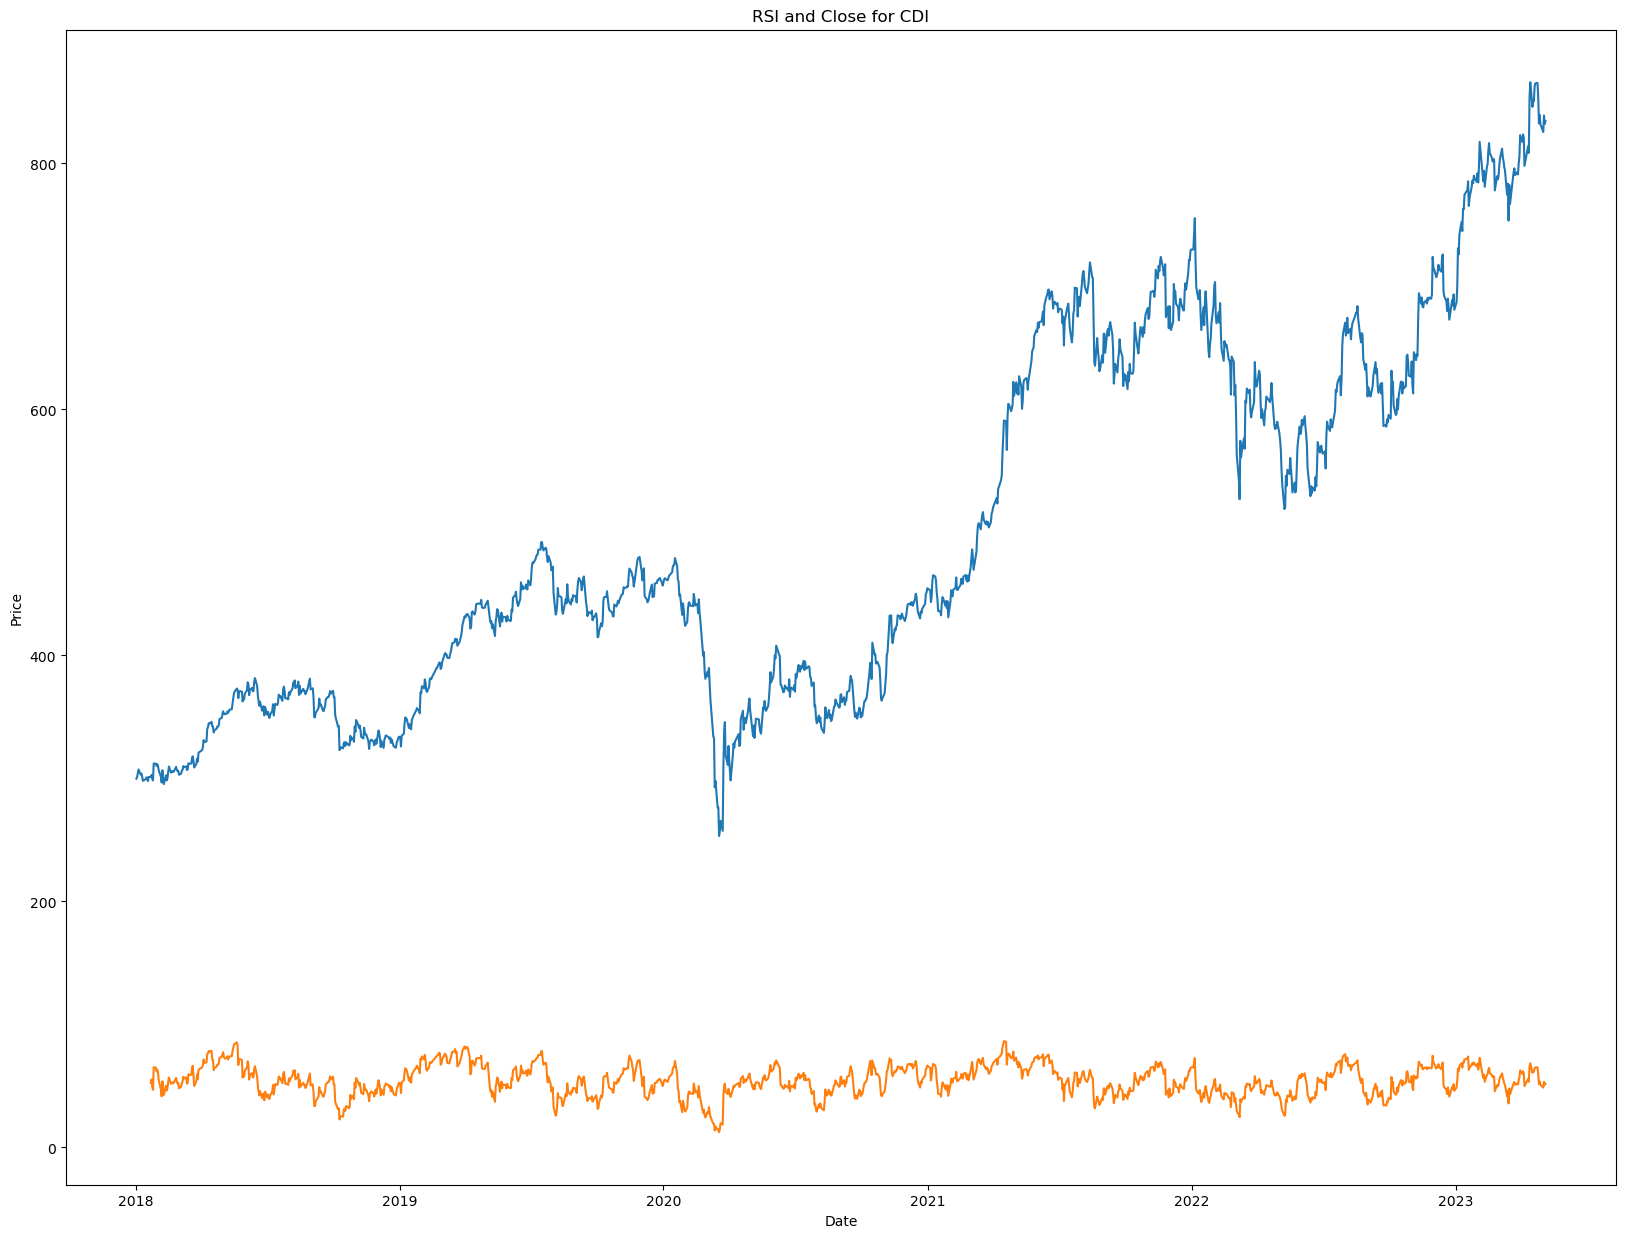

In [80]:
plt.figure(figsize=(20, 15))
plt.plot(df_cdipa.index, df_cdipa["Close"])
plt.plot(df_cdipa.index, df_cdipa["RSI"])
plt.title("RSI and Close for CDI")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

#### 2.3.2 MACD (Moving Average Convergence Divergence)
Helps traders see the trend direction, as well as the momentum of that trend. It also provides a number of trade signals.

In [81]:
?talib.MACD

Docstring:
MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])

Moving Average Convergence/Divergence (Momentum Indicators)

Inputs:
    real: (any ndarray)
Parameters:
    fastperiod: 12
    slowperiod: 26
    signalperiod: 9
Outputs:
    macd
    macdsignal
    macdhist
Type:      function

In [83]:
def MACD(stock):
    df = stock.copy()
    df["MACD"] = talib.MACD(df["Close"], fastperiod=26, slowperiod=12, signalperiod=9)[0]
    df["MACD_signal"] = talib.MACD(df["Close"], fastperiod=26, slowperiod=12, signalperiod=9)[1]
    return df

In [84]:
df_cdipa = MACD(df_cdipa)
df_cfrsw = MACD(df_cfrsw)
df_lulu = MACD(df_lulu)
df_mcpa = MACD(df_mcpa)
df_moncmi = MACD(df_moncmi)
df_pndoraco = MACD(df_pndoraco)
df_rl = MACD(df_rl)
df_rmspa = MACD(df_rmspa)
df_uhrsw = MACD(df_uhrsw)
df_vfc = MACD(df_vfc)

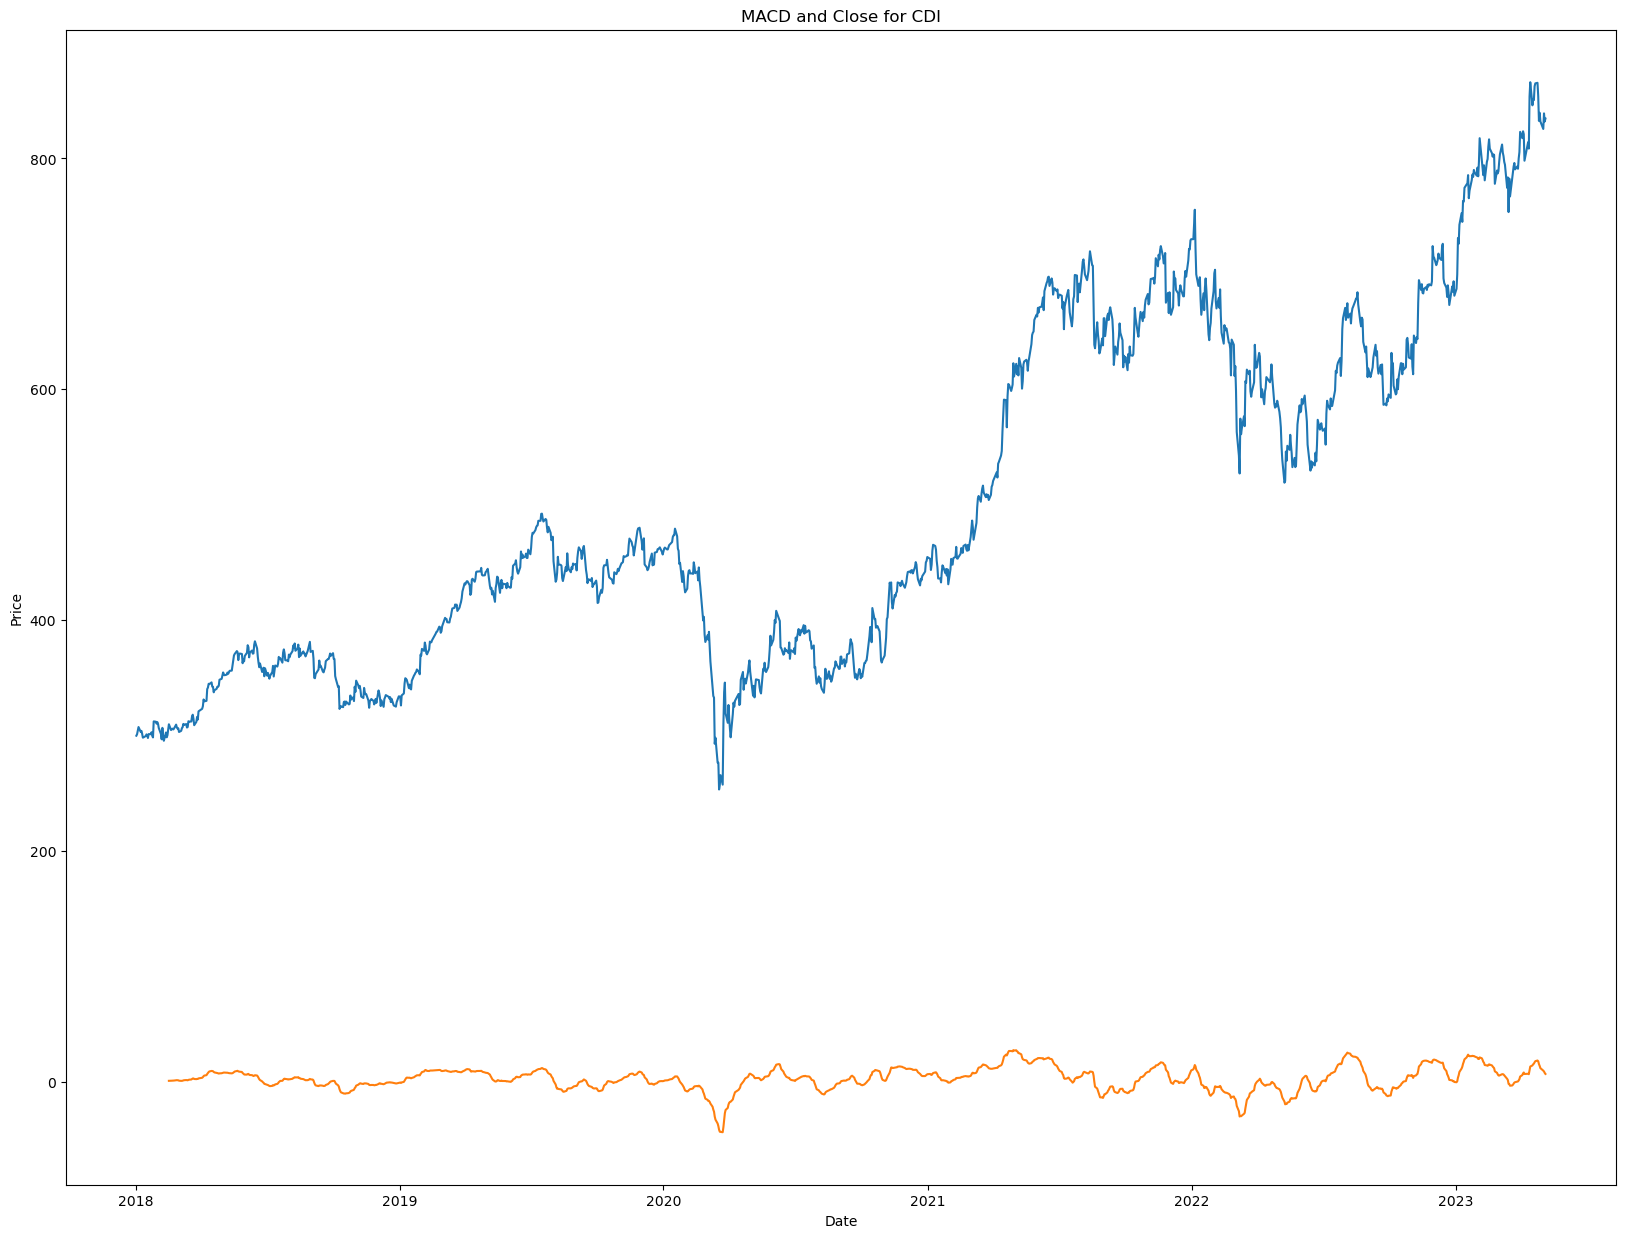

In [86]:
plt.figure(figsize=(20, 15))
plt.plot(df_cdipa.index, df_cdipa["Close"])
plt.plot(df_cdipa.index, df_cdipa["MACD"])
plt.title("MACD and Close for CDI")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

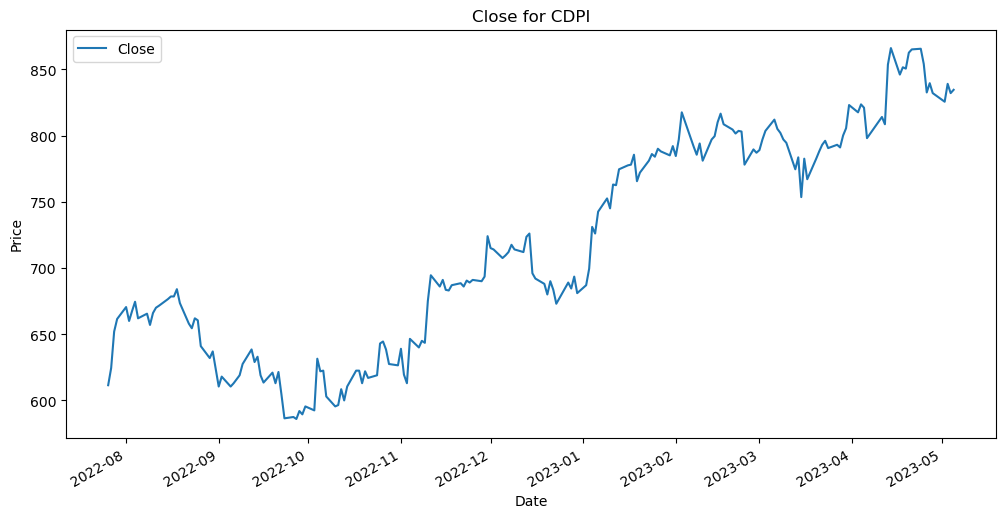

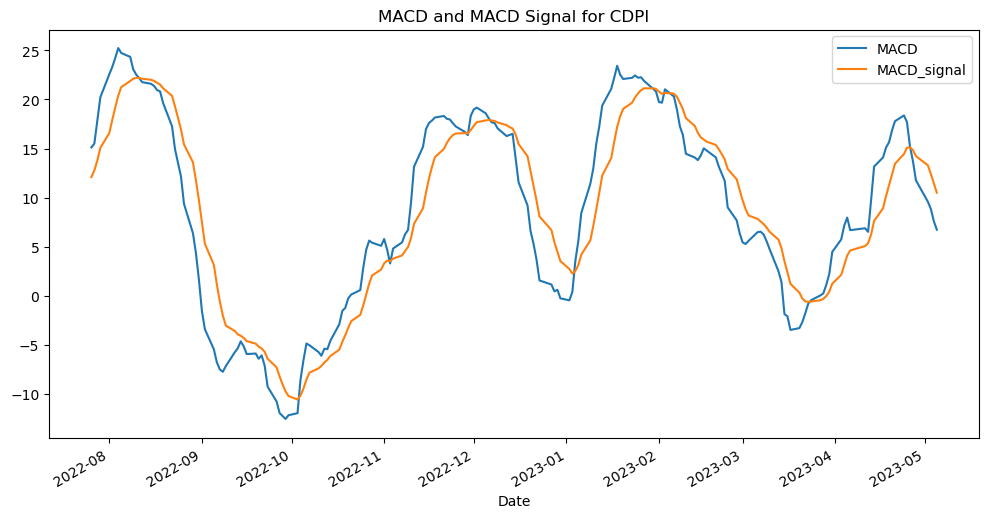

In [87]:
df_cdipa.tail(200)[['Close']].plot(figsize=(12, 6), title='Close for CDPI')
plt.ylabel("Price")
df_cdipa.tail(200)[['MACD', 'MACD_signal']].plot(figsize=(12, 6), title='MACD and MACD Signal for CDPI')
plt.show()

When the MACD is above zero, the price is in an upward phase. If the MACD is below zero, it has entered a bearish period.

The indicator is composed of two lines: the MACD line and a signal line, which moves slower. When MACD crosses below the signal line, it indicates that the price is falling. When the MACD line crosses above the signal line, the price is rising. 



#### 2.3.3 Aroon Oscillator
Aroon indicator is a technical indicator used to measure whether a security is in a trend, and more specifically if the price is hitting new highs or lows over the calculation period (typically 25). The **Aroon Oscillator** is a trend-following indicator that uses aspects of the Aroon Indicator (Aroon Up and Aroon Down) to gauge the strength of a current trend and the likelihood that it will continue.

In [88]:
?talib.AROONOSC

Docstring:
AROONOSC(high, low[, timeperiod=?])

Aroon Oscillator (Momentum Indicators)

Inputs:
    prices: ['high', 'low']
Parameters:
    timeperiod: 14
Outputs:
    real
Type:      function

In [89]:
def AROONOSC(stock):
    df = stock.copy()
    df["AROONOSC"] = talib.AROONOSC(df["High"], df["Low"], timeperiod=25)
    return df

In [90]:
df_cdipa = AROONOSC(df_cdipa)
df_cfrsw = AROONOSC(df_cfrsw)
df_lulu = AROONOSC(df_lulu)
df_mcpa = AROONOSC(df_mcpa)
df_moncmi = AROONOSC(df_moncmi)
df_pndoraco = AROONOSC(df_pndoraco)
df_rl = AROONOSC(df_rl)
df_rmspa = AROONOSC(df_rmspa)
df_uhrsw = AROONOSC(df_uhrsw)
df_vfc = AROONOSC(df_vfc)

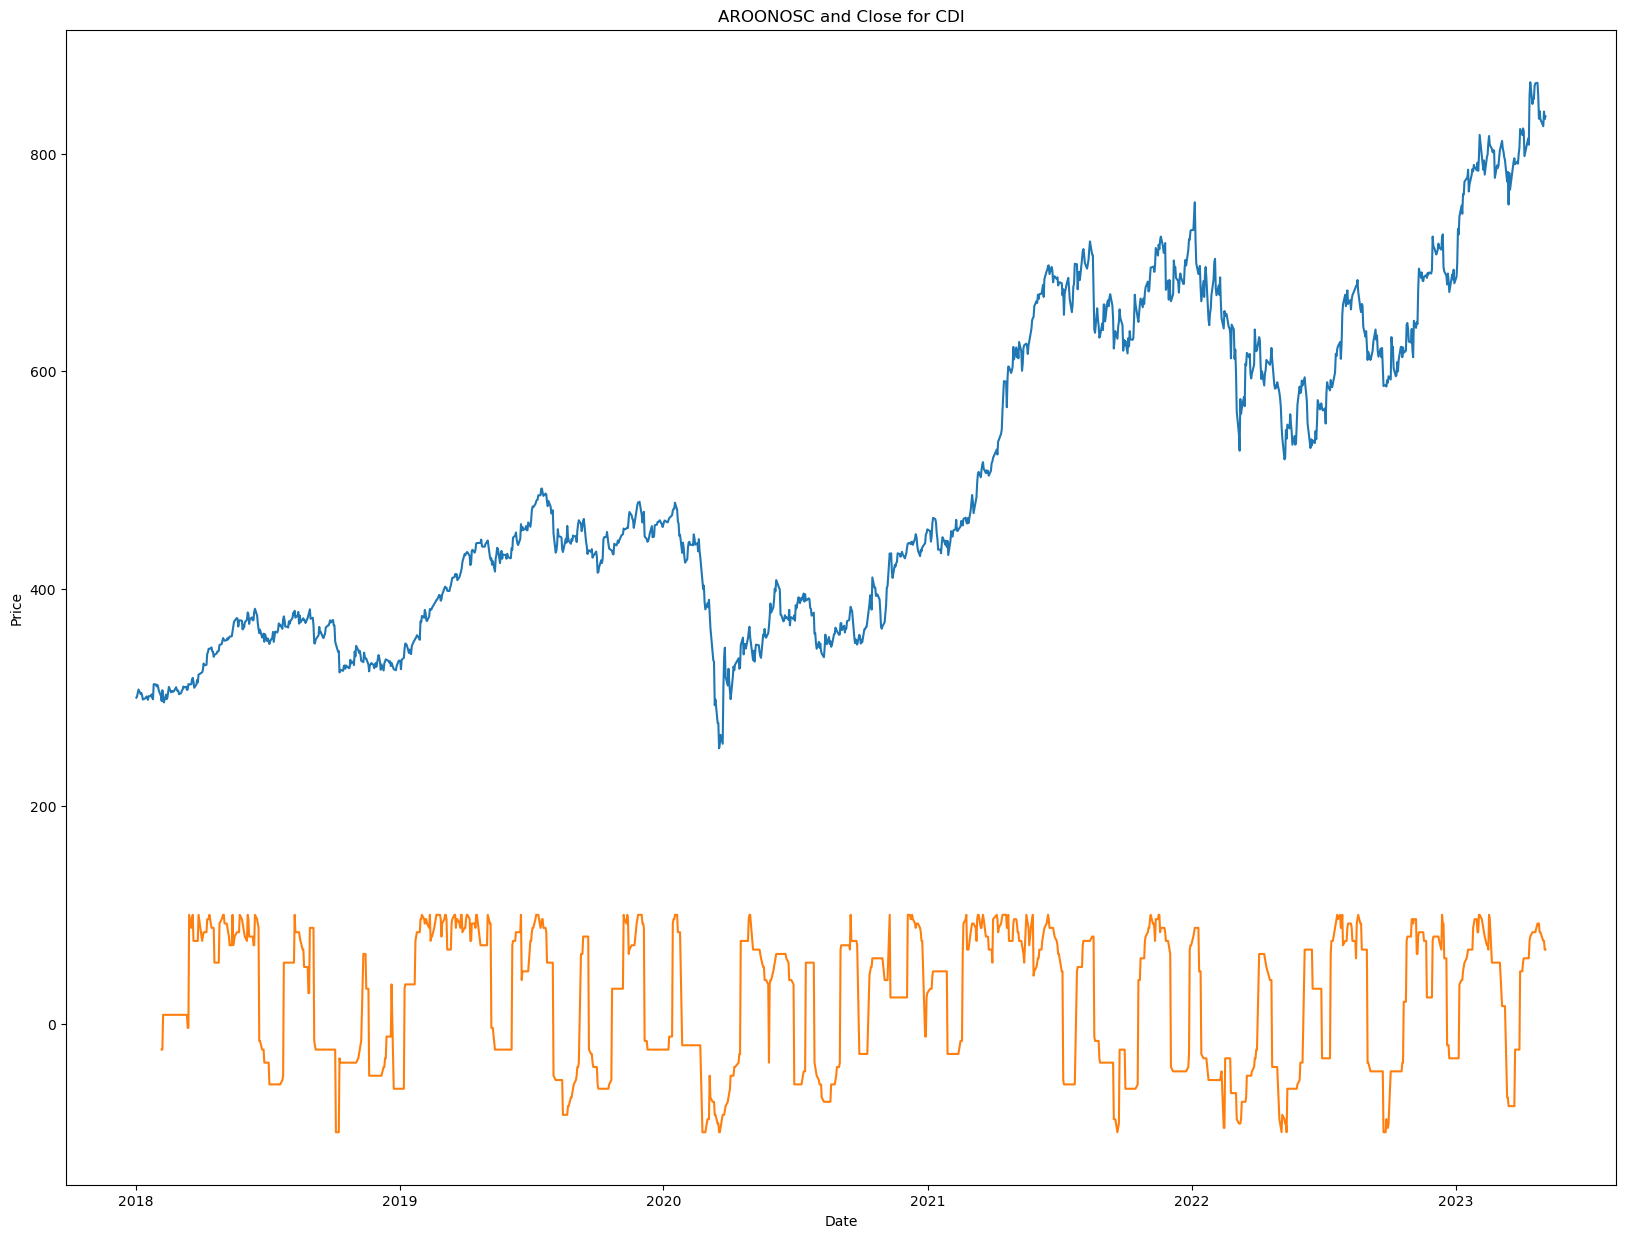

In [91]:
plt.figure(figsize=(20, 15))
plt.plot(df_cdipa.index, df_cdipa["Close"])
plt.plot(df_cdipa.index, df_cdipa["AROONOSC"])
plt.title("AROONOSC and Close for CDI")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

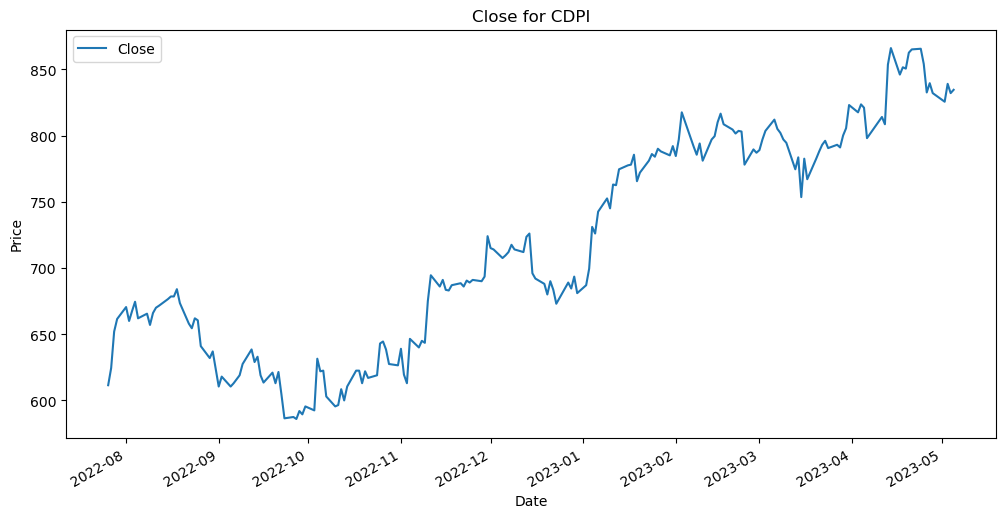

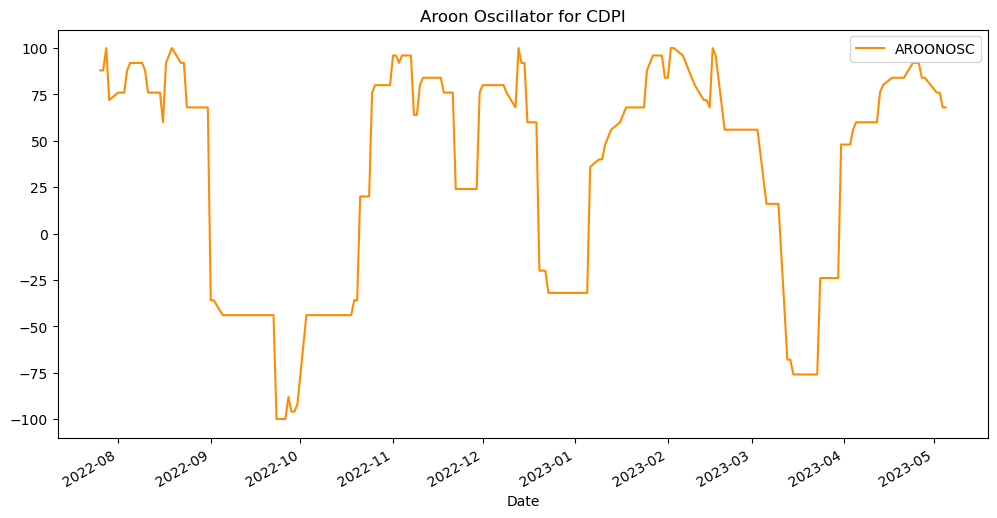

In [92]:
df_cdipa.tail(200)[['Close']].plot(figsize=(12, 6), title='Close for CDPI')
plt.ylabel("Price")
df_cdipa.tail(200)[['AROONOSC']].plot(figsize=(12, 6), title='Aroon Oscillator for CDPI', color="darkorange")
plt.show()

#### 2.3.4 On-Balance Volume
First up, use the on-balance volume indicator (OBV) to measure the positive and negative flow of volume in a security over time.
The indicator is a running total of up volume minus down volume. Up volume is how much volume there is on a day when the price rallied. Down volume is the volume on a day when the price falls. Each day volume is added or subtracted from the indicator based on whether the price went higher or lower.

When OBV is rising, it shows that buyers are willing to step in and push the price higher. When OBV is falling, the selling volume is outpacing buying volume, which indicates lower prices. In this way, it acts like a trend confirmation tool. If price and OBV are rising, that helps indicate a continuation of the trend.

In [93]:
?talib.OBV

Docstring:
OBV(real, volume)

On Balance Volume (Volume Indicators)

Inputs:
    real: (any ndarray)
    prices: ['volume']
Outputs:
    real
Type:      function

In [94]:
def OBV(stock):
    df = stock.copy()
    df["OBV"] = talib.OBV(df["Close"], df["Volume"])
    return df

In [95]:
df_cdipa = OBV(df_cdipa)
df_cfrsw = OBV(df_cfrsw)
df_lulu = OBV(df_lulu)
df_mcpa = OBV(df_mcpa)
df_moncmi = OBV(df_moncmi)
df_pndoraco = OBV(df_pndoraco)
df_rl = OBV(df_rl)
df_rmspa = OBV(df_rmspa)
df_uhrsw = OBV(df_uhrsw)
df_vfc = OBV(df_vfc)

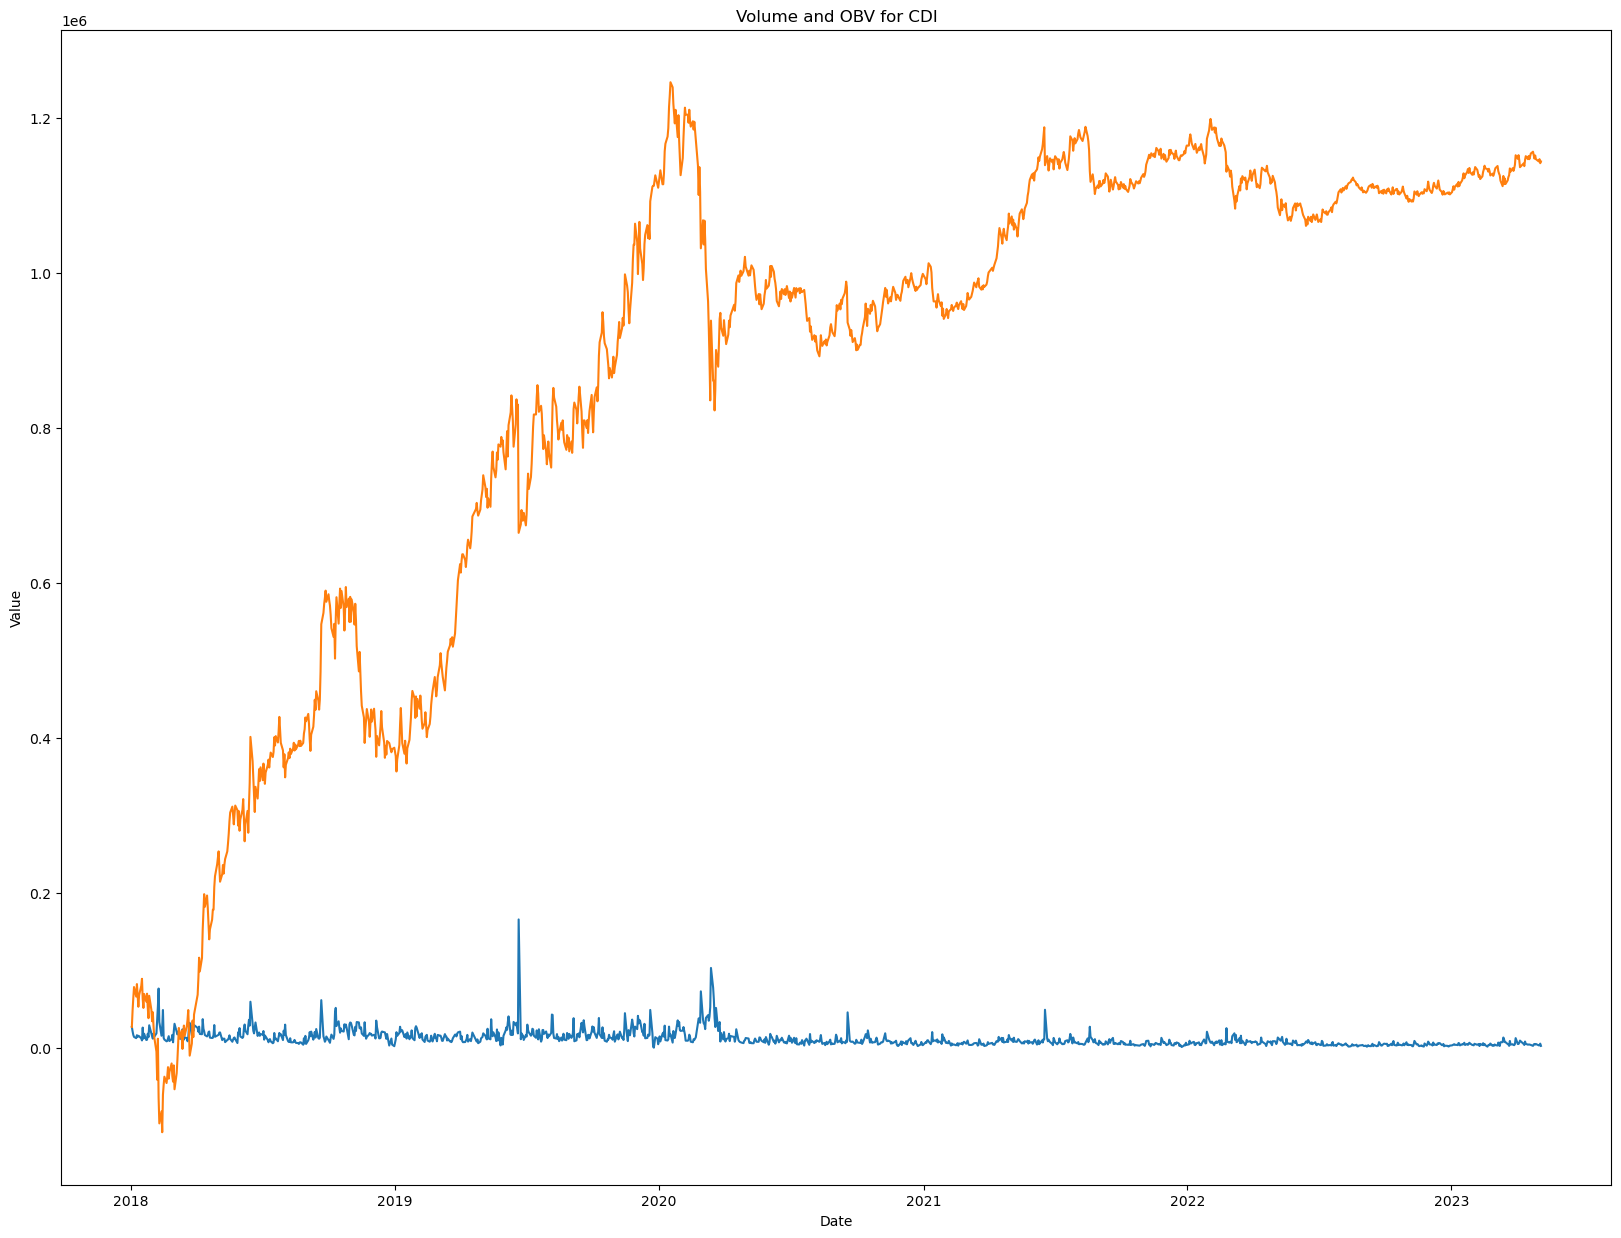

In [96]:
plt.figure(figsize=(20, 15))
plt.plot(df_cdipa.index, df_cdipa["Volume"])
plt.plot(df_cdipa.index, df_cdipa["OBV"])
plt.title("Volume and OBV for CDI")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

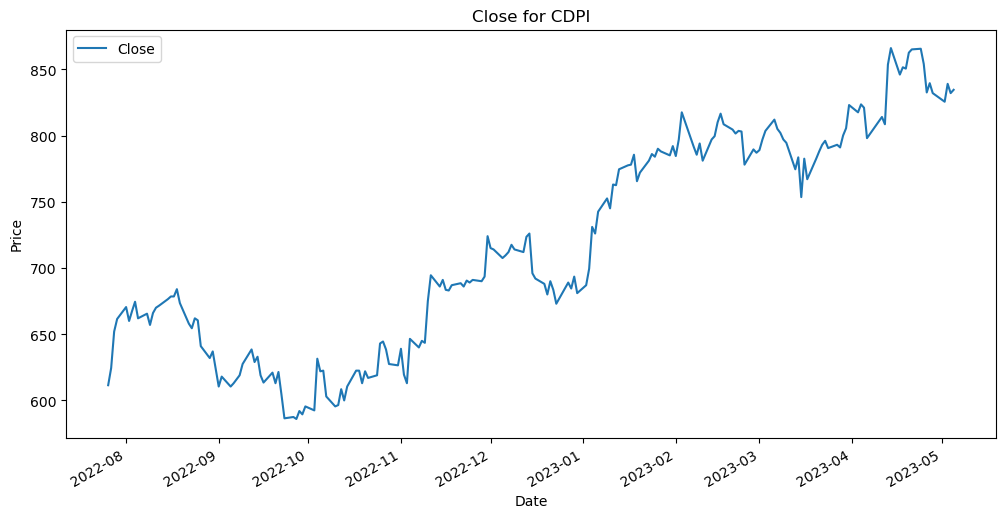

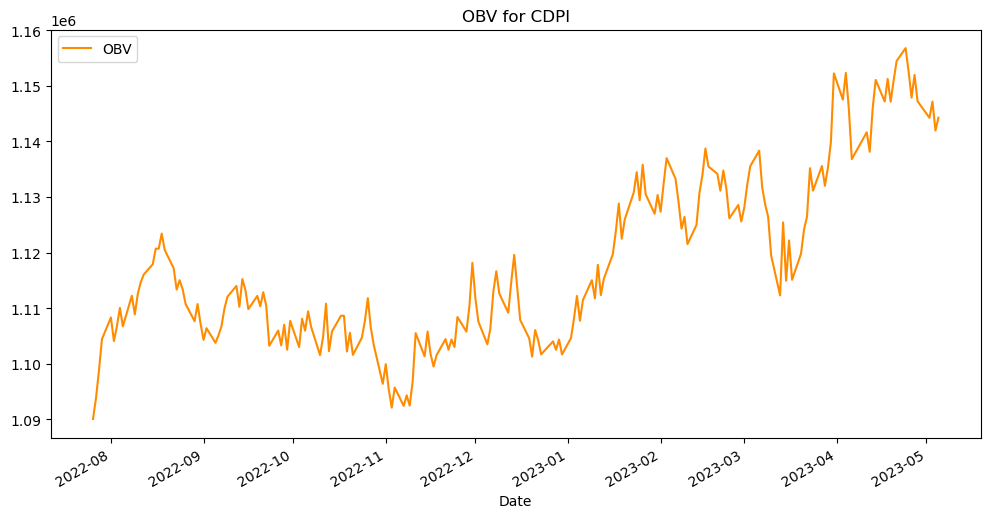

In [97]:
df_cdipa.tail(200)[['Close']].plot(figsize=(12, 6), title='Close for CDPI')
plt.ylabel("Price")
df_cdipa.tail(200)[['OBV']].plot(figsize=(12, 6), title='OBV for CDPI', color="darkorange")
plt.show()

idk i don't really get it, and i don't think it's integrable. They're two independent trading strategies.

### 2.4 Shifting Features

Finally, we need to shift all the features by 1 (because we want to predict the returns at time t based on the features at time t-1).  
We also need to remove all the rows with missing data (we have missing values in the technical indicators at the beginning of the dataset due to the time period we need to calculate them.)

In [108]:
features_to_shift = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
                     'summary_sentiment_VADER', 'RSI', 'MACD', 'MACD_signal', 
                     'AROONOSC', 'OBV']

In [109]:
def shift_features(stock, features = features_to_shift):
    df = stock.copy()
    for feature in features:
        df[feature] = df[feature].shift(1)
    df = df.dropna()
    return df

In [110]:
df_cdipa = shift_features(df_cdipa, features_to_shift)
df_cfrsw = shift_features(df_cfrsw, features_to_shift)
df_lulu = shift_features(df_lulu, features_to_shift)
df_mcpa = shift_features(df_mcpa, features_to_shift)
df_moncmi = shift_features(df_moncmi, features_to_shift)
df_pndoraco = shift_features(df_pndoraco, features_to_shift)
df_rl = shift_features(df_rl, features_to_shift)
df_rmspa = shift_features(df_rmspa, features_to_shift)
df_uhrsw = shift_features(df_uhrsw, features_to_shift)
df_vfc = shift_features(df_vfc, features_to_shift)

### 2.6 Saving the datasets

In [113]:
#Saving the datasets with features (for the other models)
df_cdipa.to_csv('data\\processed\\cdipa.csv')
df_cfrsw.to_csv('data\\processed\\cfrsw.csv')
df_lulu.to_csv('data\\processed\\lulu.csv')
df_mcpa.to_csv('data\\processed\\mcpa.csv')
df_moncmi.to_csv('data\\processed\\moncmi.csv')
df_pndoraco.to_csv('data\\processed\\pndoraco.csv')
df_rl.to_csv('data\\processed\\rl.csv')
df_rmspa.to_csv('data\\processed\\rmspa.csv')
df_uhrsw.to_csv('data\\processed\\uhrsw.csv')
df_vfc.to_csv('data\\processed\\vfc.csv')